In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
data='/kaggle/input/titanic/train.csv'
data2='/kaggle/input/titanic/test.csv'
df=pd.read_csv(data)
training=pd.read_csv(data2)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Understanding Dataset

In [2]:
print(df.head(5))
print(df.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

Filling missing values in dataset

In [3]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna('S')
training['Age']=training['Age'].fillna(training['Age'].mean())
training['Embarked']=training['Embarked'].fillna('S')
training['Fare']=training['Fare'].fillna(training['Age'].mean())

Converting string dataset to numericals 

In [4]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Sex']=LE.fit_transform(df['Sex'])
df['Embarked']=LE.fit_transform(df['Embarked'])
training['Sex']=LE.fit_transform(training['Sex'])
training['Embarked']=LE.fit_transform(training['Embarked'])

understanding patterns 

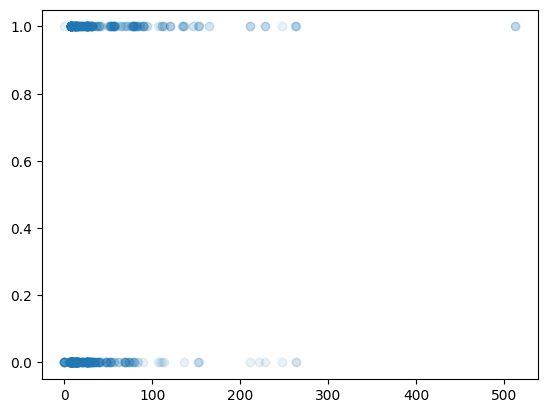

In [5]:
plt.scatter(df['Fare'],df['Survived'],alpha=0.1)

Training model

In [6]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(df[['PassengerId','Pclass','Sex','Age','Fare','SibSp','Embarked','Parch']],df['Survived'])

DecisionTreeClassifier()

Checking if there are any missing values in testing data

In [7]:
training[['PassengerId','Pclass','Sex','Age','Fare','SibSp','Embarked','Parch']].isnull().sum()


PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
SibSp          0
Embarked       0
Parch          0
dtype: int64

Model's prediction

In [8]:
prediction=DT.predict(training[['PassengerId','Pclass','Sex','Age','Fare','SibSp','Embarked','Parch']])
print(prediction)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0
 0 1 0 0 1 0 0 1 0 0 1]


Converting prediction to csv output 

In [9]:
submission = pd.DataFrame({
    'PassengerId': training['PassengerId'], 
    'Survived': prediction
})
submission.to_csv('submission.csv', index=False)